Use a pretrained image classifier from TensorFlow Hub to perform transfer learning or inference on an input image.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

In [ ]:
#Load a pretrained model from TensorFlow Hub
model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
model = Sequential([
    hub.KerasLayer(model_url, input_shape=(224, 224, 3))          
])

In [17]:
#Load ImageNet labels for decoding prediction
labels_path=tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
)
imagenet_labels=np.array(open(labels_path).read().splitlines())
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

In [15]:
#Load and preprocess a sample image
image_url = "https://tensorflow.org/images/blogs/serving/cat.jpg"
image_path = tf.keras.utils.get_file("cat.jpg", origin=image_url)

def load_and_preprocess_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])
    img = img / 255.0
    return tf.expand_dims(img, axis=0)

image=load_and_preprocess_image(image_path)


In [11]:
#Predict class using the model
predictions=model(image)
predicted_class=tf.argmax(predictions[0]).numpy()
predicted_label=imagenet_labels[predicted_class]

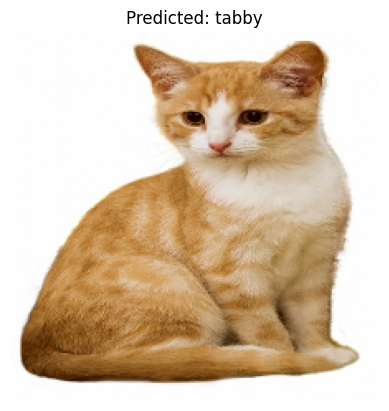

In [16]:
plt.imshow(tf.squeeze(image))
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()
